## Load Data and Initial EDA


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/diabetes.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df.head())

# Print the shape of the DataFrame
print("\nShape of the DataFrame:")
print(df.shape)

# Print a summary of the DataFrame
print("\nInformation about the DataFrame:")
df.info()

First 5 rows of the DataFrame:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Shape of the DataFrame:
(768, 9)

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------

## Summary Statistics and Data Types

In [2]:
print("\nDescriptive statistics for numerical features:")
print(df.describe())


Descriptive statistics for numerical features:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232  

In [3]:
print("\nRe-confirming data types of the DataFrame:")
df.info()


Re-confirming data types of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Visualize Data Distributions


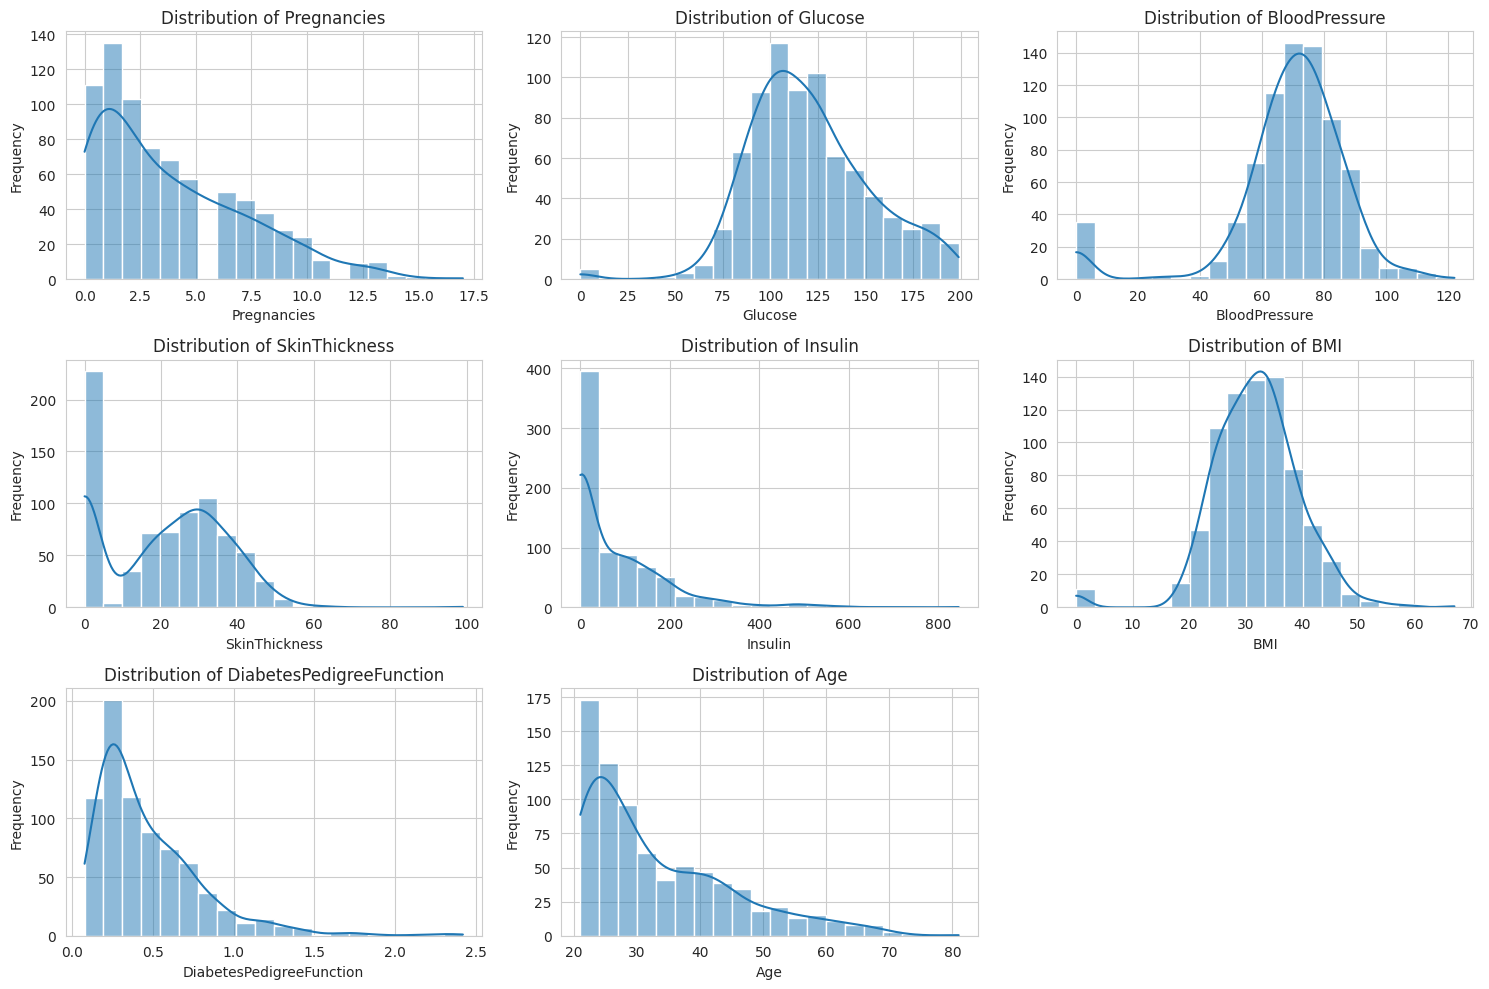

/tmp/ipython-input-3356504928.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='viridis')


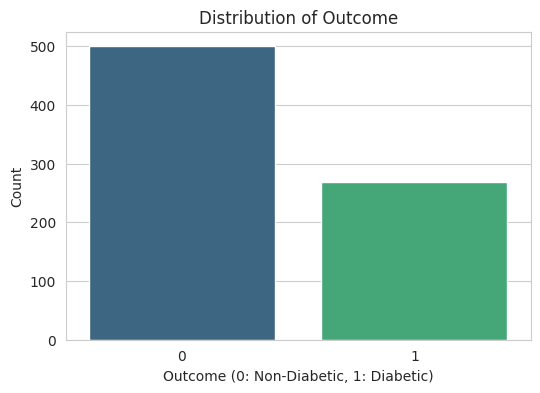

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (all except 'Outcome')
numerical_cols = df.drop(columns=['Outcome']).columns

# Set up the plotting style
sns.set_style("whitegrid")

# Create histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed, assuming 8 numerical features
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create a count plot for the 'Outcome' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='viridis')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

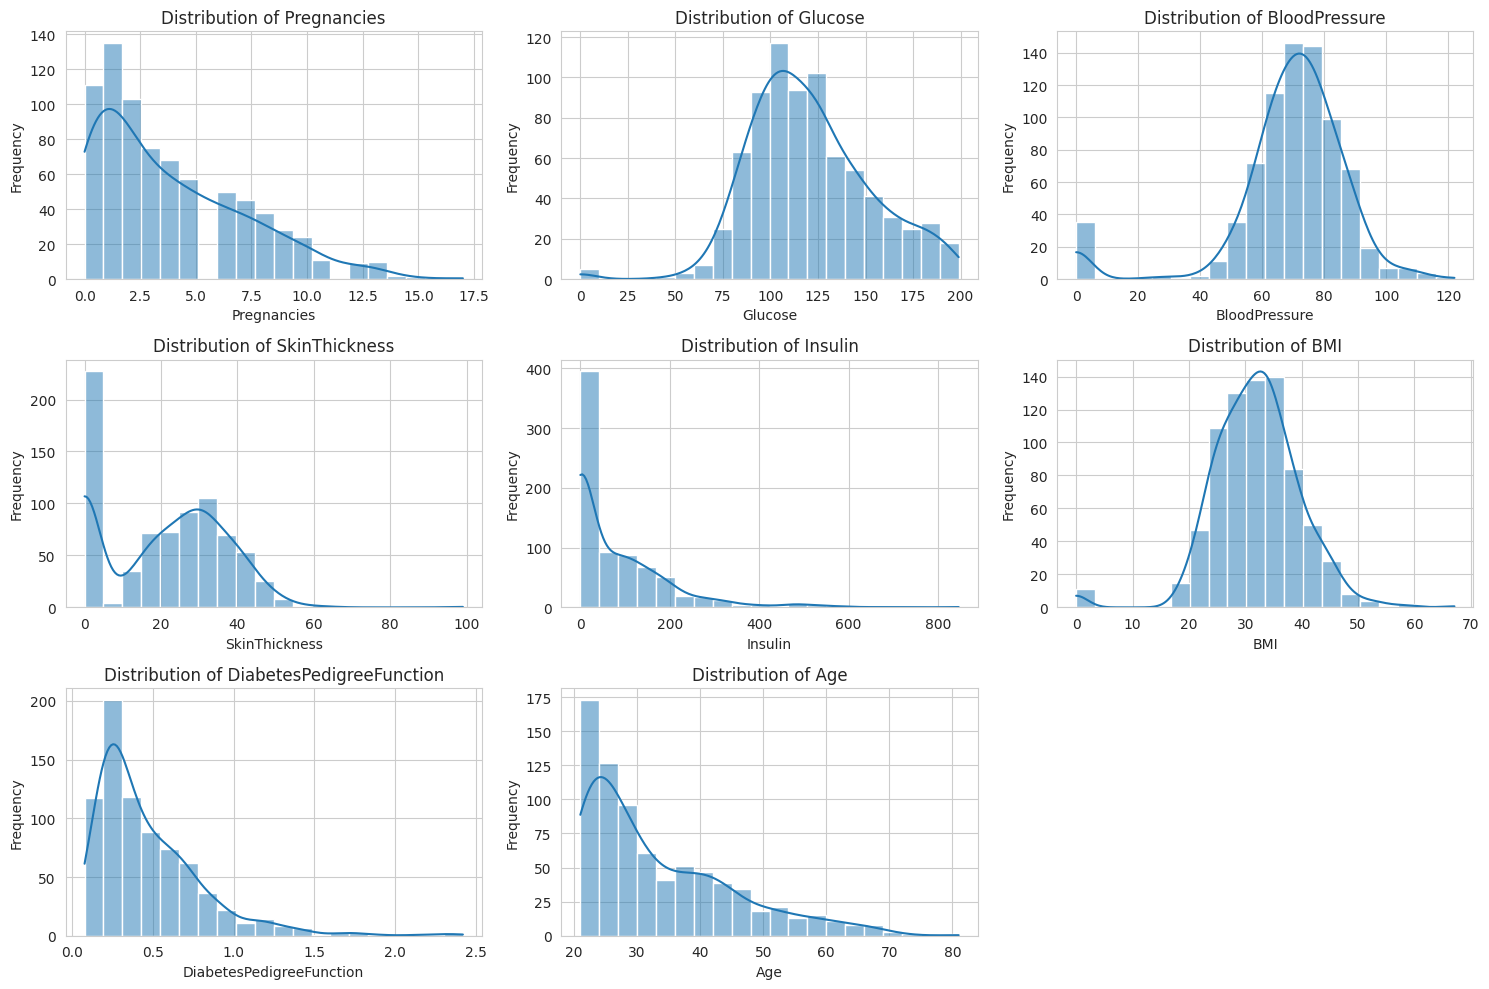

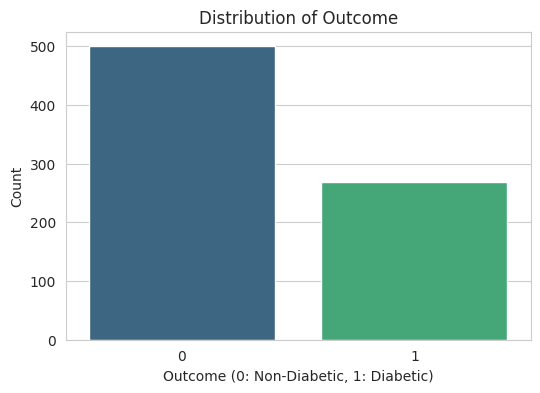

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (all except 'Outcome')
numerical_cols = df.drop(columns=['Outcome']).columns

# Set up the plotting style
sns.set_style("whitegrid")

# Create histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed, assuming 8 numerical features
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create a count plot for the 'Outcome' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df, palette='viridis', hue='Outcome', legend=False)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

## Explore Feature Relationships


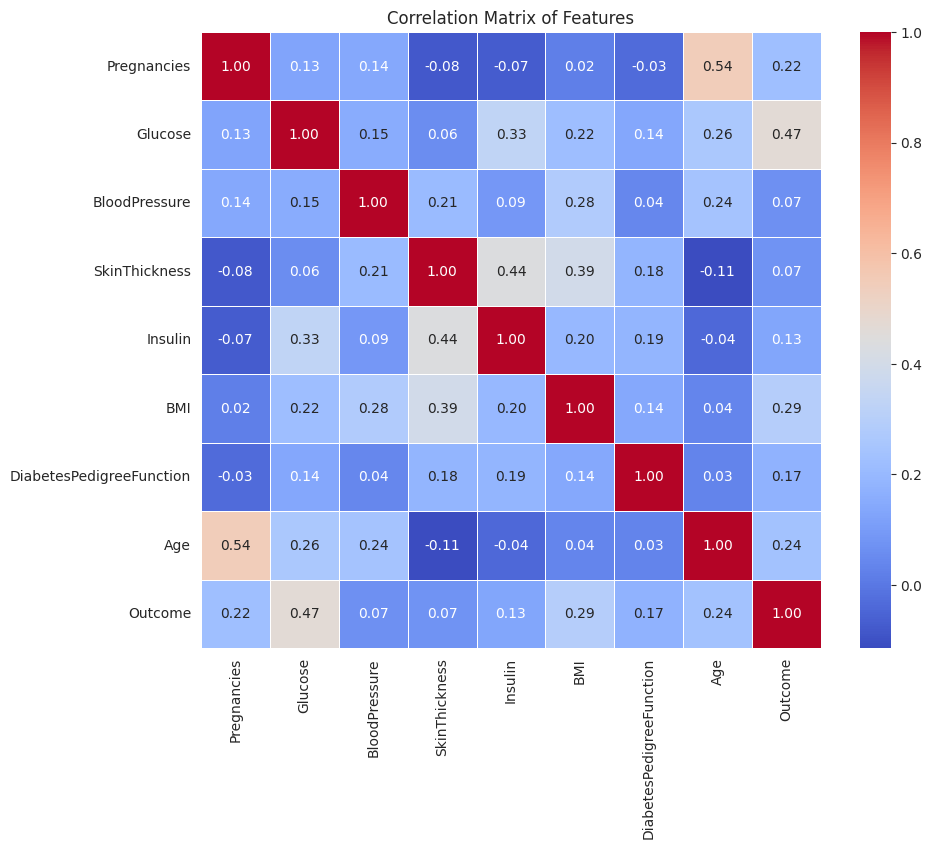

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

Generating pair plot (this may take a moment)...


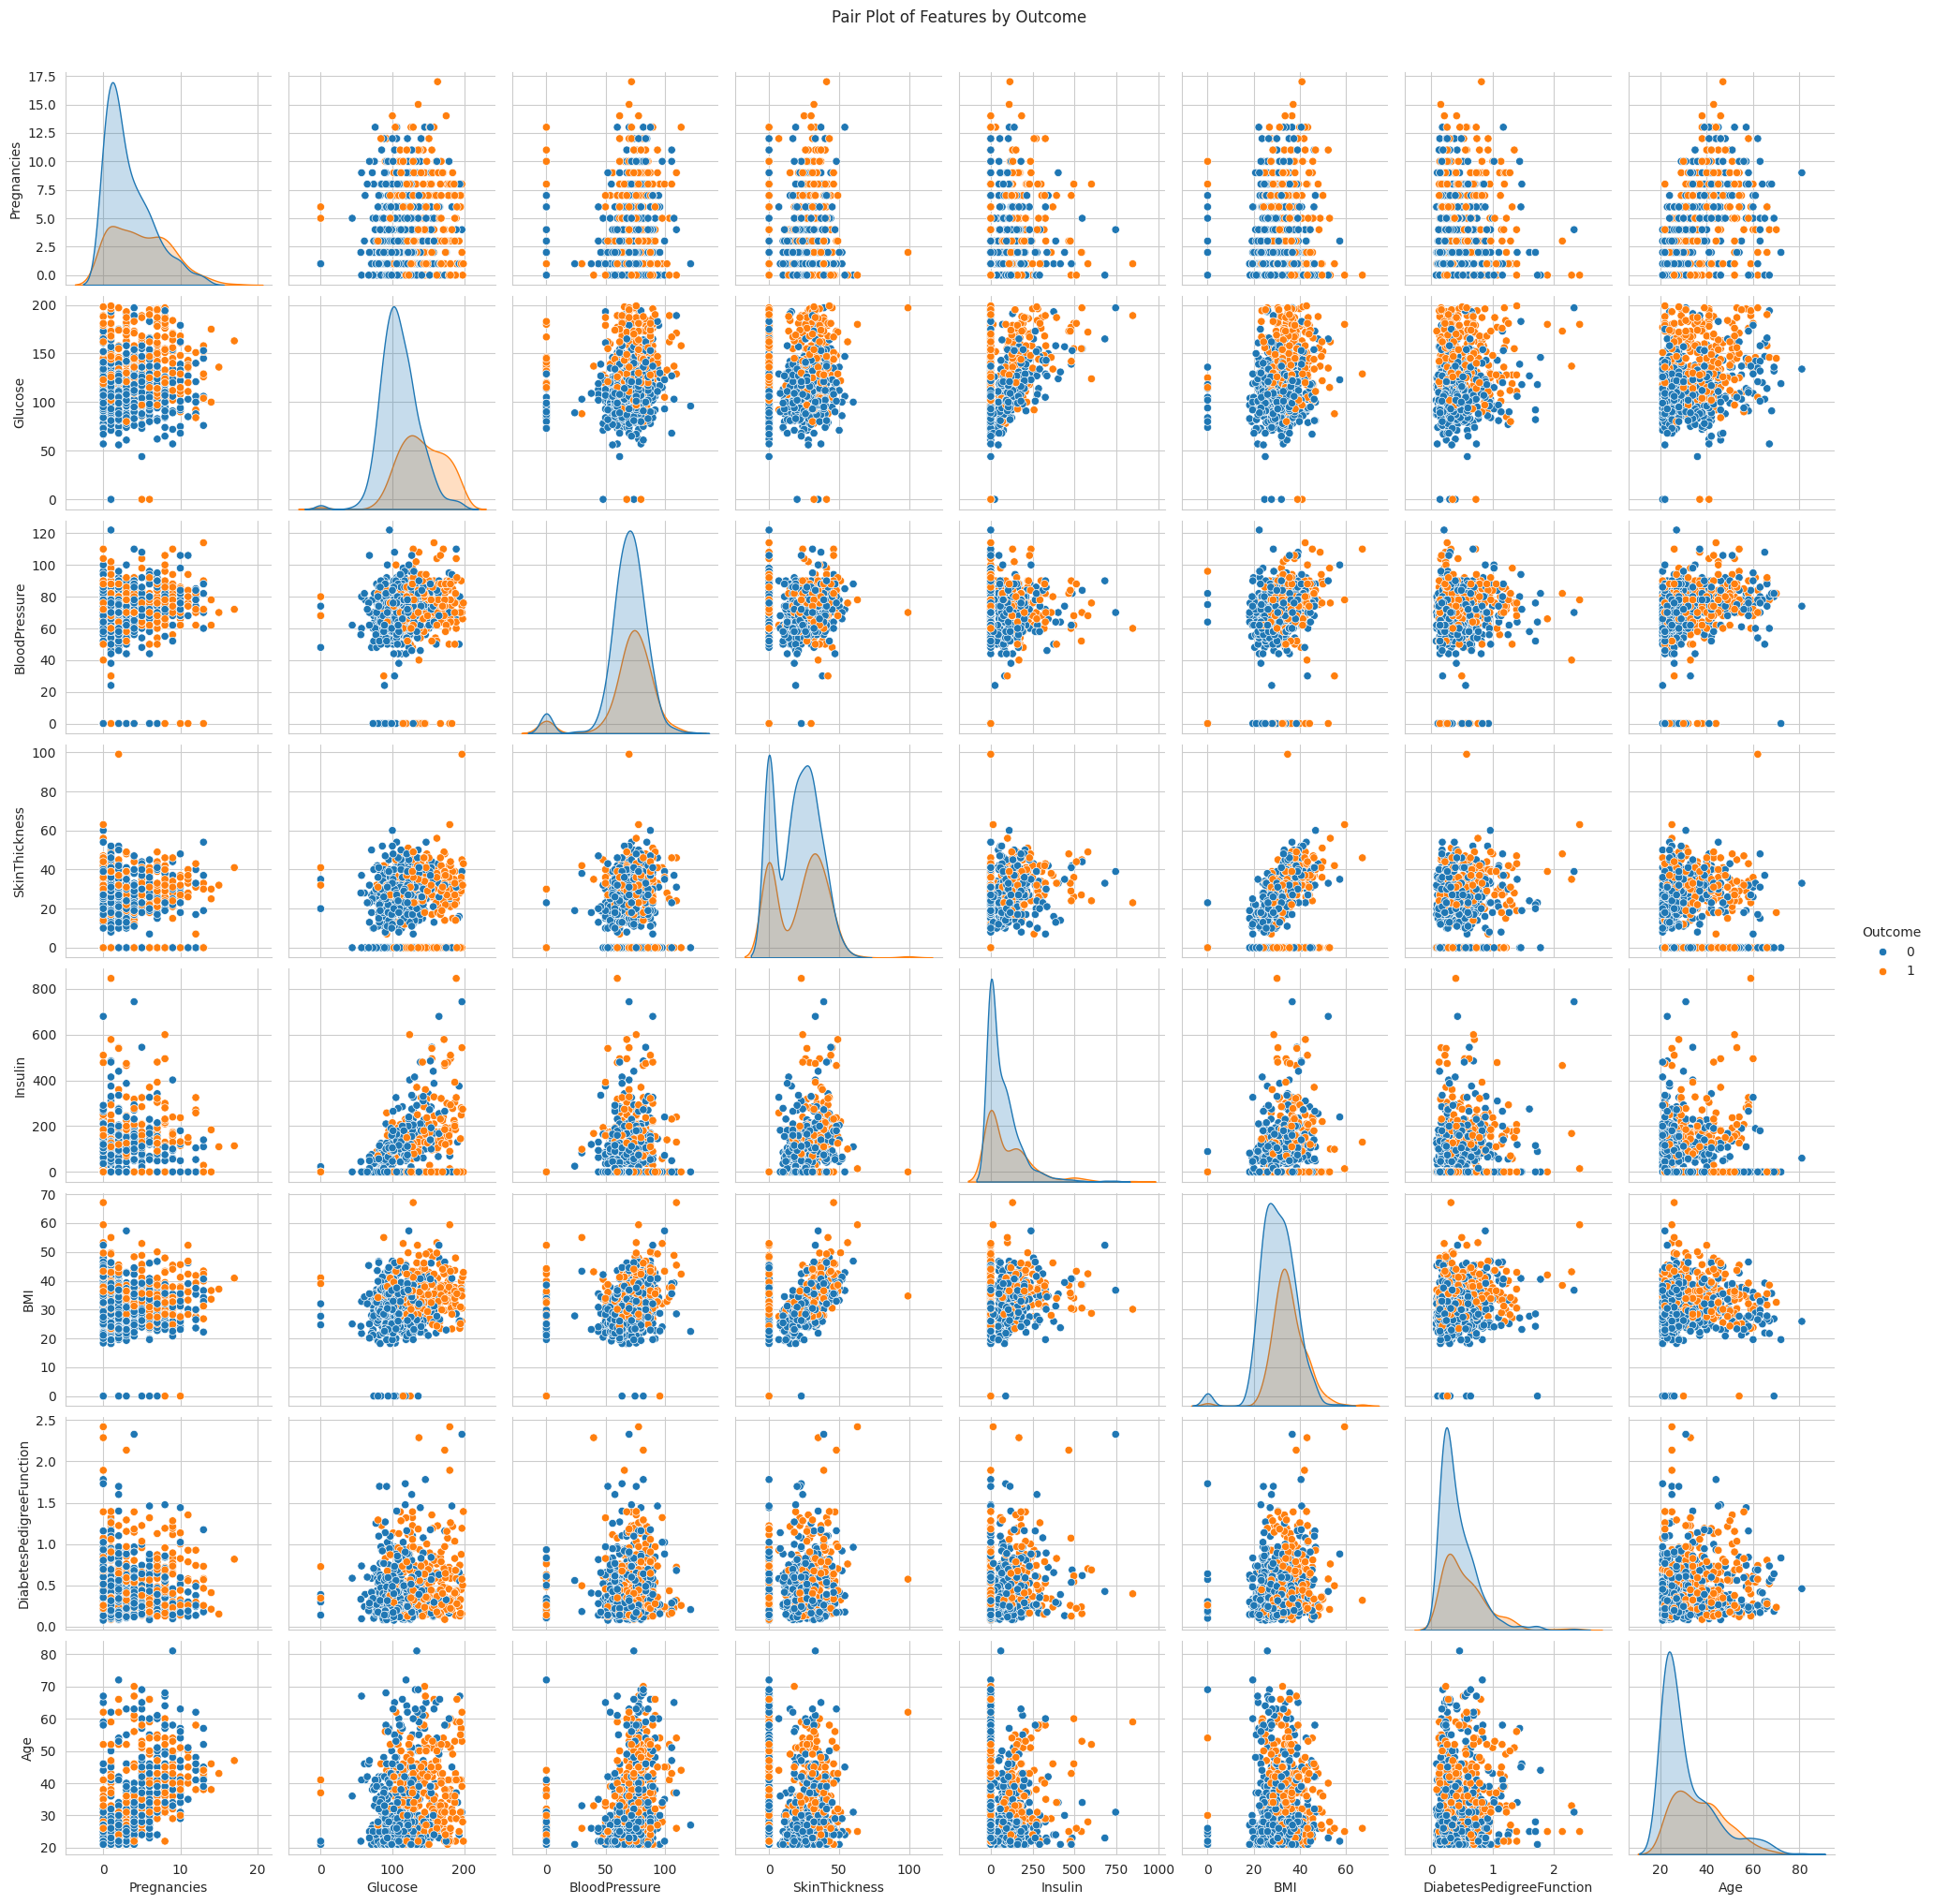

Pair plot generated.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pair plot to visualize relationships between all features, colored by 'Outcome'
# This might take a while for larger datasets or more features.
print("Generating pair plot (this may take a moment)...")

sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Outcome', y=1.02) # Adjust title position
plt.show()
print("Pair plot generated.")

## Handle Missing Values

In [8]:
import numpy as np

# Identify columns that can't realistically be zero
# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
zero_replacement_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values in these columns with NaN
for col in zero_replacement_cols:
    df[col] = df[col].replace(0, np.nan)

print("Zero values in specified columns replaced with NaN.")
print("Number of NaN values after replacement:")
print(df[zero_replacement_cols].isnull().sum())

Zero values in specified columns replaced with NaN.
Number of NaN values after replacement:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [9]:
print("Imputing NaN values with the median for specified columns...")

for col in zero_replacement_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)
    print(f"Median for {col}: {median_val}")

print("NaN values imputed.")

# Verify that there are no remaining NaN values in the imputed columns
print("\nNumber of NaN values after imputation:")
print(df[zero_replacement_cols].isnull().sum())

# Verify that there are no remaining zero values in the imputed columns
# (This check is specifically for the columns where zeros were replaced with NaN)
print("\nNumber of zero values after imputation in the original 'zero_replacement_cols':")
for col in zero_replacement_cols:
    print(f"{col}: {(df[col] == 0).sum()}")

Imputing NaN values with the median for specified columns...
Median for Glucose: 117.0
Median for BloodPressure: 72.0
Median for SkinThickness: 29.0
Median for Insulin: 125.0
Median for BMI: 32.3
NaN values imputed.

Number of NaN values after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Number of zero values after imputation in the original 'zero_replacement_cols':
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


/tmp/ipython-input-2435525535.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


In [10]:
print("Imputing NaN values with the median for specified columns...")

for col in zero_replacement_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"Median for {col}: {median_val}")

print("NaN values imputed.")

# Verify that there are no remaining NaN values in the imputed columns
print("\nNumber of NaN values after imputation:")
print(df[zero_replacement_cols].isnull().sum())

# Verify that there are no remaining zero values in the imputed columns
# (This check is specifically for the columns where zeros were replaced with NaN)
print("\nNumber of zero values after imputation in the original 'zero_replacement_cols':")
for col in zero_replacement_cols:
    print(f"{col}: {(df[col] == 0).sum()}")

Imputing NaN values with the median for specified columns...
Median for Glucose: 117.0
Median for BloodPressure: 72.0
Median for SkinThickness: 29.0
Median for Insulin: 125.0
Median for BMI: 32.3
NaN values imputed.

Number of NaN values after imputation:
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

Number of zero values after imputation in the original 'zero_replacement_cols':
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0


## Encode Categorical Variables

## Split Data and Build Logistic Regression Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Separate features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler.")

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

print("Logistic Regression model trained successfully.")

Data split into training and testing sets.
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)
Features scaled using StandardScaler.
Logistic Regression model trained successfully.


## Evaluate Model Performance

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print(f"Model Performance on Test Data:\n")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

Model Performance on Test Data:

Accuracy:  0.7532
Precision: 0.6667
Recall:    0.6182
F1-Score:  0.6415
ROC-AUC:   0.8228


## Visualize ROC Curve

<Figure size 800x600 with 0 Axes>

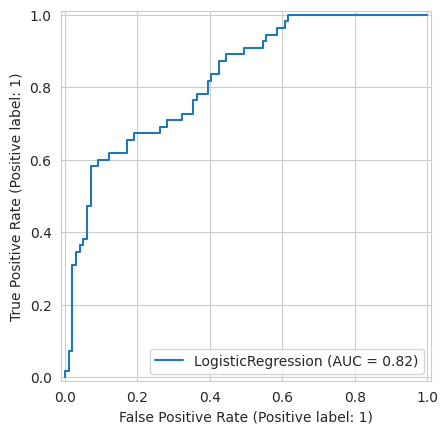

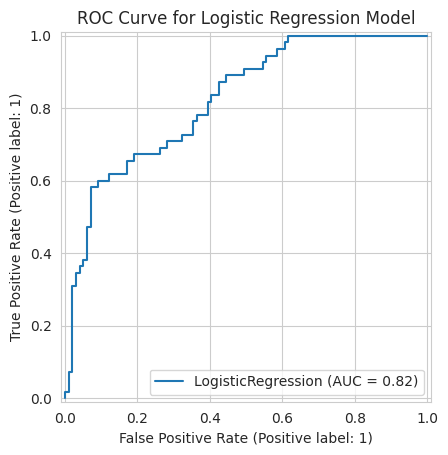

ROC Curve plotted successfully.


In [13]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
roc_display.plot()
plt.title('ROC Curve for Logistic Regression Model')
plt.grid(True)
plt.show()

print("ROC Curve plotted successfully.")

## Interpret Model Coefficients

In [14]:
import pandas as pd

# Get the coefficients and intercept from the trained model
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Get the feature names from X (before scaling)
feature_names = X.columns

# Create a Series to store coefficients with their corresponding feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print("\nModel Intercept:")
print(f"{intercept:.4f}")

print("\nModel Coefficients:")
print(coef_df)


Model Intercept:
-0.8663

Model Coefficients:
                    Feature  Coefficient
0               Pregnancies     0.222399
1                   Glucose     1.100750
2             BloodPressure    -0.151057
3             SkinThickness     0.067853
4                   Insulin    -0.138229
5                       BMI     0.686856
6  DiabetesPedigreeFunction     0.203486
7                       Age     0.390974


## Prepare for Streamlit Deployment (Model Saving)

In [15]:
import joblib

# Save the trained logistic regression model
joblib.dump(model, 'logistic_regression_model.joblib')
print("Trained logistic regression model saved as 'logistic_regression_model.joblib'")

# Save the StandardScaler object
joblib.dump(scaler, 'scaler.joblib')
print("StandardScaler object saved as 'scaler.joblib'")

Trained logistic regression model saved as 'logistic_regression_model.joblib'
StandardScaler object saved as 'scaler.joblib'


## Develop Streamlit Application Structure

```python
# streamlit_app.py

import streamlit as st
import joblib
import numpy as np
import pandas as pd

# Set the title of the Streamlit application
st.title('Diabetes Prediction App')

# Add a short introductory markdown text
st.markdown("""
This application predicts the likelihood of diabetes based on several health indicators.
Input your details below to get a prediction.
""")

# You would typically load your model and scaler here:
# model = joblib.load('logistic_regression_model.joblib')
# scaler = joblib.load('scaler.joblib')

# For now, just a placeholder to show the structure.
# Future steps will involve adding input widgets and prediction logic.

# Example of a placeholder input:
# st.sidebar.header('Input Features')
# pregnancies = st.sidebar.slider('Pregnancies', 0, 17, 3)
```

## Streamlit User Input and Prediction Logic

In [16]:
%%writefile streamlit_app.py

import streamlit as st
import joblib
import pandas as pd
import numpy as np

# Load the trained model and scaler
@st.cache_resource
def load_model_and_scaler():
    model = joblib.load('logistic_regression_model.joblib')
    scaler = joblib.load('scaler.joblib')
    return model, scaler

model, scaler = load_model_and_scaler()

st.set_page_config(page_title="Diabetes Prediction App", layout="centered")
st.title("Diabetes Prediction App")
st.write("Please enter the patient's details to predict the likelihood of diabetes.")

# Sidebar for user input
st.sidebar.header('Patient Data Input')

def user_input_features():
    pregnancies = st.sidebar.slider('Pregnancies', 0, 17, 3) # Min: 0, Max: 17, Default: 3 (from df.describe() mean/median)
    glucose = st.sidebar.slider('Glucose (mg/dL)', 44.0, 199.0, 117.0) # Min: 44, Max: 199, Default: 117 (from median)
    blood_pressure = st.sidebar.slider('Blood Pressure (mmHg)', 24.0, 122.0, 72.0) # Min: 24, Max: 122, Default: 72 (from median)
    skin_thickness = st.sidebar.slider('Skin Thickness (mm)', 7.0, 99.0, 29.0) # Min: 7, Max: 99, Default: 29 (from median)
    insulin = st.sidebar.slider('Insulin (mu U/ml)', 14.0, 846.0, 125.0) # Min: 14, Max: 846, Default: 125 (from median)
    bmi = st.sidebar.slider('BMI', 18.2, 67.1, 32.3) # Min: 18.2, Max: 67.1, Default: 32.3 (from median)
    dpf = st.sidebar.slider('Diabetes Pedigree Function', 0.078, 2.42, 0.372) # Min: 0.078, Max: 2.42, Default: 0.372 (from median)
    age = st.sidebar.slider('Age (years)', 21, 81, 29) # Min: 21, Max: 81, Default: 29 (from median)

    data = {
        'Pregnancies': pregnancies,
        'Glucose': glucose,
        'BloodPressure': blood_pressure,
        'SkinThickness': skin_thickness,
        'Insulin': insulin,
        'BMI': bmi,
        'DiabetesPedigreeFunction': dpf,
        'Age': age
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

st.subheader('User Input:')
st.write(input_df)

# Scale the input features
input_scaled = scaler.transform(input_df)

# Make prediction
prediction_proba = model.predict_proba(input_scaled)[:, 1]
prediction = (prediction_proba > 0.5).astype(int)

st.subheader('Prediction Result:')
if prediction[0] == 1:
    st.error(f"The patient is predicted to be Diabetic with a probability of {prediction_proba[0]:.2f}")
else:
    st.success(f"The patient is predicted to be Non-Diabetic with a probability of {1 - prediction_proba[0]:.2f}")

st.subheader('Prediction Probability:')
st.write(f"Probability of Diabetes: {prediction_proba[0]:.2f}")
st.write(f"Probability of Non-Diabetes: {1 - prediction_proba[0]:.2f}")

st.markdown("""
---
This app uses a Logistic Regression model trained on the Pima Indians Diabetes Database.
""")


Writing streamlit_app.py
